## Sunshine, Stats, and Success: A Tale of the Sunlight Mountain Shop

Sunlight Mountain, in Glenwood Springs, Colorado, shimmered with the promise of fresh powder. Inside the bustling Sunlight Mountain Shop, however, a different kind of excitement crackled. Sarah, the store manager, surveyed the sales floor, her eyes alight with the thrill of the hunt – the hunt for data-driven insights.

Gone were the days of relying solely on intuition. Sarah, a data enthusiast, had embraced the power of numbers. Every sale, every returned item, every customer interaction was meticulously tracked and analyzed. It was a treasure trove of information waiting to be unlocked.

One day, a dip in sales for googles and gloves caught Sarah's attention. Diving deeper, she discovered a correlation – the dip coincided with a sudden drop in temperatures. Tourists, unprepared for the unexpected chill, were opting for cheaper rentals instead.

Sarah, armed with this knowledge, proposed a flash sale on high-end jackets, bundled with thermal wear at a discounted price. The strategy was a hit. The bundled option, perfectly tailored to the sudden weather shift, flew off the shelves. Sales soared, exceeding even the peak season numbers.



In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
print('Libraries Loaded')

Libraries Loaded


Sarah's data-driven approach transformed the Sunlight Mountain Shop. The store became a haven for prepared skiers, happy families, and, of course, impressive sales figures. The story of the Sunlight Mountain Shop became a testament to the power of combining human intuition with the magic of data – a story where sunshine, stats, and success went hand in hand.

In [2]:
file_path = '../data/raw/sales/Sales by Year, Month, Day and Hour 20240227 - Sunlight Ski and Bike Shop Resort.csv'
df2 = pd.read_csv('../data/raw/sales/2021-2022 - Sunlight Ski and Bike Shop.csv', encoding='unicode_escape')
# df.reset_index(inplace=True)
df2.columns.tolist()

['SKU',
 'Description',
 'Category',
 'Vendor',
 'SaleDate',
 'CustomerLocation',
 'Quantity',
 'Total',
 'Month',
 'Day',
 'Year',
 'MSRP',
 'Discount',
 'Sales',
 'Cost',
 'Profit',
 'Margin']

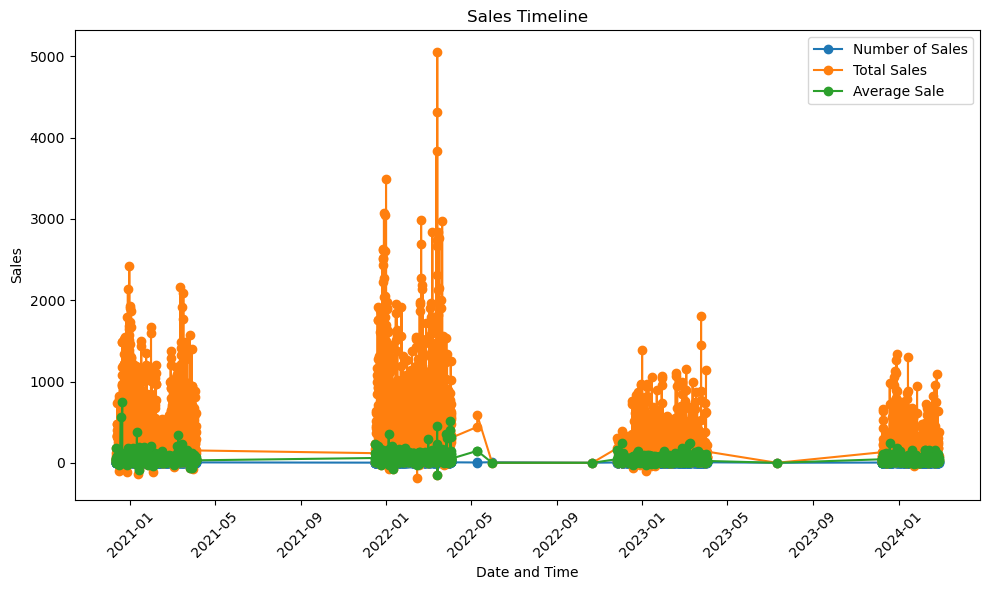

In [3]:
# Step 1: Read the CSV file
df = pd.read_csv(file_path)

# Step 2: Rearrange date components and convert to datetime
df['Datetime'] = pd.to_datetime(df[['Yr', 'Mth', 'Dy', 'Hr']].astype(str).agg('-'.join, axis=1))

# Step 3: Group by datetime and aggregate sales data
grouped_data = df.groupby('Datetime').agg({'# of Sales': 'sum', 'Sales': 'sum', 'Avg Sale': 'mean'}).reset_index()

# Step 4: Plot the timeline chart
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['Datetime'], grouped_data['# of Sales'], label='Number of Sales', marker='o')
plt.plot(grouped_data['Datetime'], grouped_data['Sales'], label='Total Sales', marker='o')
plt.plot(grouped_data['Datetime'], grouped_data['Avg Sale'], label='Average Sale', marker='o')

plt.xlabel('Date and Time')
plt.ylabel('Sales')
plt.title('Sales Timeline')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
grouped_data['Datetime'] = grouped_data['Datetime'].resample(rule='W').last() 

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

This shows the seasonality of purchases in the retail store at Sunlight mountain. 

In [12]:
# # Define the starting date
start_date = datetime.datetime.strptime("2020-12-11", "%Y-%m-%d")

# # Create a list of dates with 67682 months (adjust as needed)
date_list = [start_date + datetime.timedelta(days=(30 * i)) for i in range(3147)]

# # Add a new column 'index' with the date list
df['index'] = date_list

# # Set the 'index' column as the index of the DataFrame
df.set_index('index', inplace=True)

# Remove the 'index' name (optional)
df.index.name = None

print(df)

                       Yr       Mth  Dy  Hr  # of Sales   Sales  Avg Sale  \
2020-12-11 00:00:00  2020  December  11  10           1   35.00     35.00   
2021-01-10 00:00:00  2020  December  11  11           2   35.00     17.50   
2021-02-09 00:00:00  2020  December  11  12           1   54.99     54.99   
2021-03-11 00:00:00  2020  December  11  13           1   47.50     47.50   
2021-04-10 00:00:00  2020  December  11  14           4    5.48      1.37   
...                   ...       ...  ..  ..         ...     ...       ...   
2279-01-08 00:00:00  2024  February   9  13          10  302.22     30.22   
2279-02-07 00:00:00  2024  February   9  14           3  155.61     51.87   
2279-03-09 00:00:00  2024  February   9  15           8  231.41     28.93   
2279-04-08 00:00:00  2024  February   9   8           2  148.49     74.25   
2279-05-08 00:00:00  2024  February   9   9           7  724.32    103.47   

                               Datetime  
2020-12-11 00:00:00 2020-12-11 10

<Figure size 640x480 with 0 Axes>

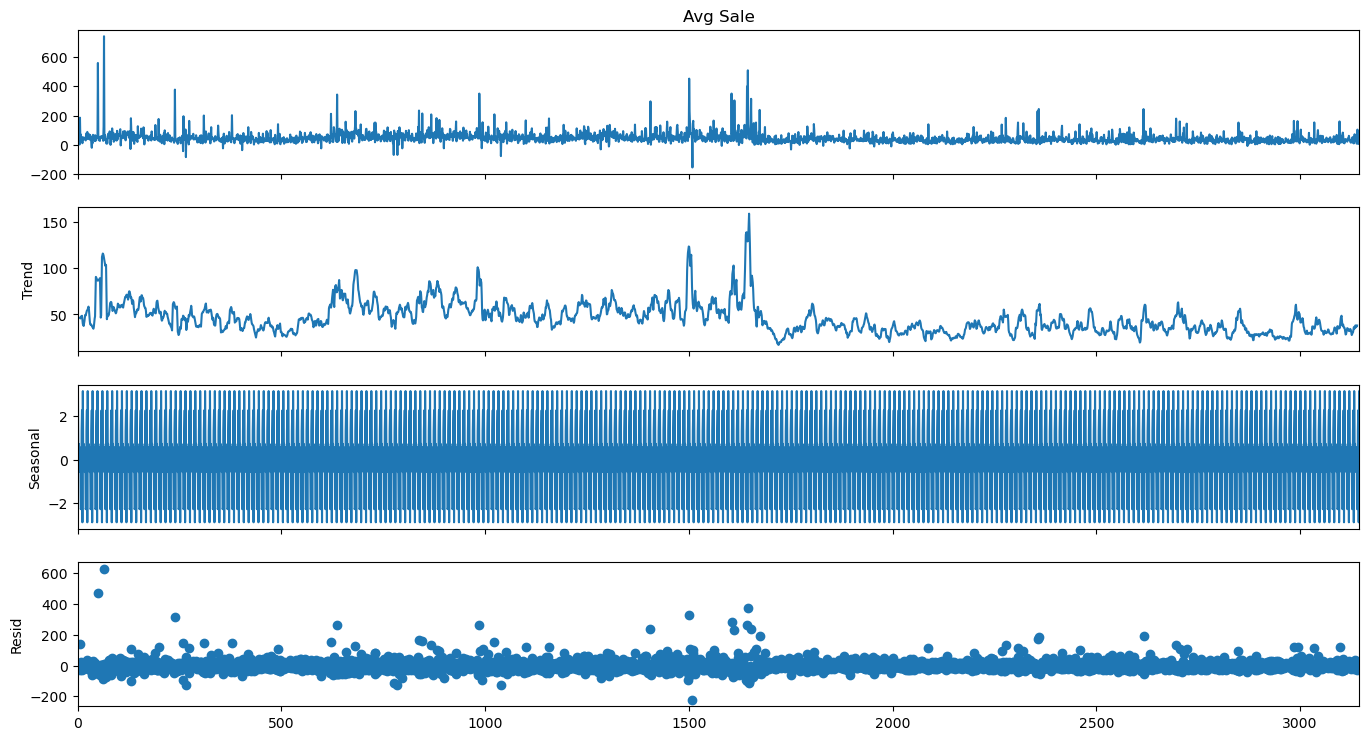

In [13]:
decomposition = seasonal_decompose(grouped_data['Avg Sale'], period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [14]:
df.columns= ['Avg Sale']
df['Avg Sale'] = df.avg_sale.apply(lambda x: int(x)*100)
df.riders.plot(figsize=(12,8), title= 'Monthly Ridership', fontsize=14)
# plt.savefig('month_ridership.png', bbox_inches='tight')

ValueError: Length mismatch: Expected axis has 8 elements, new values have 1 elements

In [ ]:
df.riders.plot(figsize=(12,8), title= 'Monthly Ridership', fontsize=14)
# plt.savefig('month_ridership.png', bbox_inches='tight')

In [ ]:
trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.residual  

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput 

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.iloc[13:], lags=40, ax=ax2)